In [3]:
import numpy as np, matplotlib.pyplot as plt
import os

# add path for python routines
import sys
sys.path.append('../')

# import polarization model functions
import polarization_2005_model as pol

This jupyter notebook shows how to read and plot the results for a polarization model based on Kahniashvili, Gogoberidze and Ratra (2005) toy model

See compute_toymodel_polarization notebook for more details on the computation

In [40]:
## Access file where data is stored
home = os.getenv("HOME")
dir0 = home + '/tex/roper/helical/data/demo/'
dir0 = home + '/tex/roper/helical/python/'
dir0 = home + '/tex/roper/helical/data/'

# heading of specific case
# Kol refers to Kolmogorov type spectrum
# Mo refers to Moiseev type spectrum
# br indicates broken power law is used

# define case

sph1 = "lowh_"
sph0 = "Kol"

broken = False

if broken == True:
    sph = sph0 + "br"
else:
    sph = sph0

# read data
if sph0 == "Mo":
    nS = -11/3
    nA = -11/3
elif sph0 == "Kol":
    nS = -11/3
    nA = -14/3
    
#headn = dir0 + "neg_" + sph0
head = dir0 + sph1 + sph
    
# define array of h values and read spectra

# For negative h
#h = np.linspace(-1, -0.1, 10)
#spn = pol.read_file_pol(nS, nA, h, broken, headn)

# For positive h
#h = np.linspace(0.1, 1., 10)
h = np.asarray([0.001, 0.005, 0.01, 0.05])
sp = pol.read_file_pol(nS, nA, h, broken, head)

/home/alberto/tex/roper/helical/data/lowh_Kol_nS_-3.67_nA_-4.67
directory does not exist to read data file


FileNotFoundError: [Errno 2] No such file or directory: '/home/alberto/tex/roper/helical/data/lowh_Kol_nS_-3.67_nA_-4.67/h=0.00.txt'

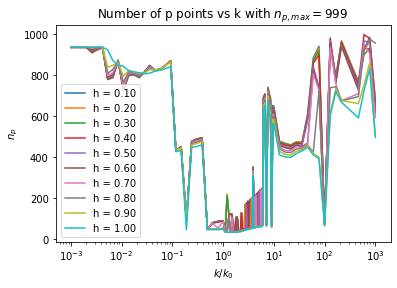

In [211]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]
hs_ind = range(0, 10)

# plot n_p vs k
for i in hs_ind:

    _= plt.plot(sp.k, sp.n_p[:, i],
                    label = "h = %.2f"%sp.h[i])

_= plt.title('Number of p points vs k '
                'with $n_{p,max} = %i$'%sp.npmax)

_= plt.xscale('log')
_= plt.xlabel('$k/k_0$')
_= plt.ylabel('$n_p$')
_= plt.legend()

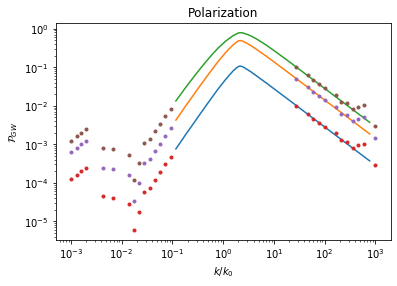

In [22]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]
#hs_ind = range(0, 10)

# Plot polarization where converged
for i in hs_ind:
    _ = plt.plot(sp.k_good, sp.P_good[:,i],
              label = "h = %.2f"%sp.h[i])

# Plot polarization where not converged
for i in hs_ind:
    _ = plt.plot(sp.k_bad, sp.P_bad[:,i], '.',
              label = "not conv h = %.2f"%sp.h[i])

_ = plt.xscale('log')
_ = plt.yscale('log')
#_ = plt.ylim([5e-4, 1.])
#_ = plt.xlim([1, 10])
#_ = plt.legend()
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

We can also plot IS, IA in the same plot as P to compare the different spectra.
Since IS and IA are only computed up to some multiplicative factor, we normalize IS and IA such that ISmax = 1

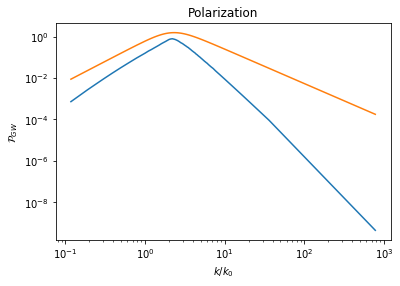

In [131]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]
hs_ind = range(0, 10)
hs_ind = 9

# compensate spectra by k^2 factor
k = sp.k_good
fac_comp = k**2
IS = np.zeros((len(sp.k_good), sp.nh))
IA = np.zeros((len(sp.k_good), sp.nh))
model_IA = np.zeros((len(sp.k_good), sp.nh))
n1_IA = 2
n2_IA = -5/3
kp = np.zeros(sp.nh)
for i in range(0, sp.nh):
    kp[i] = k[np.argmax(sp.IA_good[:, i])]
    A = (kp[i]**(-n1_IA) + kp[i]**(-n2_IA))*np.max(sp.IA_good[:, i])
    model_IA[:, i] = A*(k/kp[i])**n1_IA/(1 + (k/kp[i])**(n1_IA - n2_IA))
    IS[:, i] = sp.IS_good[:, i]*fac_comp**(0)
    IA[:, i] = sp.IA_good[:, i]*fac_comp**(0)

# compute normalizing factor
fact = np.zeros(sp.nk)
fact = np.max(IS, 0)

# Plot polarization where converged
if np.size(hs_ind) > 1:
    for i in hs_ind:
        #_ = plt.plot(sp.k_good, sp.P_good[:,i],
        #          label = "P for h = %.2f"%sp.h[i])
        #_ = plt.plot(sp.k_good, sp.IS_good[:,i]/fact[i],
        #            label = "IS for h = %.2f"%sp.h[i])
        _ = plt.plot(k, IA[:, i]/fact[i],
                    label = "IA for h = %.2f"%sp.h[i])

    # Plot polarization where not converged
    #for i in hs_ind:
    #    _ = plt.plot(sp.k_bad, sp.P_bad[:,i], '.',
    #              label = "not conv h = %.2f"%sp.h[i])
else:
    i = hs_ind
    #_ = plt.plot(k, sp.P_good[:, i],
    #              label = "P for h = %.2f"%sp.h[i])
    # = plt.plot(k, IS[:,i]/fact[i],
    #                label = "IS for h = %.2f"%sp.h[i])
    _ = plt.plot(k, IA[:,i]/fact[i],
                    label = "IA for h = %.2f"%sp.h[i])
    _ = plt.plot(k, model_IA[:, i]/fact[i])

_ = plt.xscale('log')
_ = plt.yscale('log')
#_ = plt.ylim([1e-6, 1.])
#_ = plt.legend()
#_ = plt.xlim([1e-1, 1e2])
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

In [38]:
# function that returns parameters of model for
# a broken power law model
def model_power_law(k, sp):
    f0 = sp[0]
    fl = sp[-1]
    k0 = k[0]
    kl = k[-1]
    k1 = k[np.where(k == 0.7)]
    f1 = sp[np.where(k == 0.7)]
    k2 = k[np.where(k == 6.)]
    f2 = sp[np.where(k == 6.)]
    kp = k[np.argmax(sp)]
    fp = np.max(sp)
    
    n1 = np.log10(f0/f1)/np.log10(k0/k1)
    n2 = np.log10(fl/f2)/np.log10(kl/k2)
    
    return n1, n2, fp, kp

# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = 9

# compute model for IA
k = sp.k_good
inds = np.where(k <= 10)
k = k[inds]
IA = np.zeros((len(k), sp.nh))
model_IA = np.zeros((len(k), sp.nh))

#for i in range(0, sp.nh):
#    IA[:, i] = sp.IA_good[inds, i]
#    n1, n2, fp, kp = model_power_law(k, IA[:, i])
#    ind1 = np.where(k < kp)
#   ind2 = np.where(k >= kp)
    
#    model_IA[ind1, i] = fp*(k[ind1]/kp)**n1
#    model_IA[ind2, i] = fp*(k[ind2]/kp)**n2
    
# compute normalizing factor
#fact = np.zeros(len(k))
#fact = np.max(IS, 0)

# Plot polarization where converged
#_ = plt.plot(k, IA[:, hs_ind],
                     #IA[:, i]/fact[i],
#    label = "IA for h = %.2f"%sp.h[hs_ind])

#_ = plt.xscale('log')
#_ = plt.yscale('log')

#_ = plt.plot(k, model_IA[:, hs_ind])

In [39]:
# function that returns parameters of model for
# a broken power law model
def model2_power_law(k, sp, conv_lev):
    f0 = sp[0]
    fl = sp[-1]
    k0 = k[0]
    kl = k[-1]
    kp = k[np.argmax(sp)]
    fp = np.max(sp)
    
    n10 = np.log10(f0/fp)/np.log10(k0/kp)/1.1
    n20 = np.log10(fl/fp)/np.log10(kl/kp)/1.1
    #n10 = 0.1
    #n20 = -0.1
    
    print(n10, n20)
    
    conv = False
    converged = True
    
    j = 0
    nmax = 2
    while conv == False:
    
        n1, n2 = Newton_Raphson(n10, n20, f0, fl, fp, k0, kl, kp)
        
        diff1 = abs(n1 - n10)/abs(n1)
        diff2 = abs(n2 - n20)/abs(n2)
        diff = max(diff1, diff2)
        
        if diff < conv_lev:
            conv = True
        else:
            n10 = n1
            n20 = n2
            if j == nmax:
                conv = True
                converged = False
            j += 1
    
        print(n1, n2)
    
    return n1, n2, fp, kp, f0, k0, fl, kl, converged

def Newton_Raphson(n10, n20, f0, fl, fp, k0, kl, kp):
    
    J = np.zeros((2, 2))
    J[0, 0] = .5*f0/fp*(n10 - n20)*(k0/kp)**(n10 - n20 - 1) - n10*(k0/kp)**(n10 - 1)
    J[0, 1] = -.5*f0/fp*(n10 - n20)*(k0/kp)**(n10 - n20 - 1)
    J[1, 0] = .5*fl/fp*(n10 - n20)*(kl/kp)**(n10 - n20 - 1) - n10*(kl/kp)**(n10 - 1)
    J[1, 1] = -.5*fl/fp*(n10 - n20)*(kl/kp)**(n10 - n20 - 1)
    
    func0 = np.zeros(2)
    
    func0[0] = .5*f0/fp*(1 + (k0/kp)**(n10 - n20)) - (k0/kp)**n10
    func0[1] = .5*fl/fp*(1 + (kl/kp)**(n10 - n20)) - (kl/kp)**n10
    
    invJ = np.linalg.inv(J)
    
    x0 = np.zeros(2)
    x0[0] = n10
    x0[1] = n20
    print(x0)
    
    x1 = x0 - np.matmul(invJ, func0)
    n11 = x1[0]
    n12 = x1[1]
    
    return n11, n12

def model_spectrum(sp, k, h):

    conv = 5e-1
    n1, n2, fp, kp, f0, k0, fl, kl, converged = model2_power_law(k, sp, conv)
    n1, n2, fp, kp = model_power_law(k, sp)
    model_sp = 2*fp*(k/kp)**n1/(1 + (k/kp)**(n1 - n2))
    plt.plot(k, sp)
    plt.plot(k, model_sp)
    plt.xscale('log')
    plt.yscale('log')
    return n1, n2, model_sp
    


# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

k = sp.k_good
inds = np.where(k <= 10)
ind2 = np.where(k[inds] >=1e-2)
k = k[ind2]


i = 9
IA = sp.IA_good[ind2, i][0]
IS = sp.IS_good[ind2, i][0]
P = sp.IS_good[ind2, i][0]

plt.figure()
#n1A, n2A, IA_model = model_spectrum(IA, k, h[i])
#n1S, n2S, IS_model = model_spectrum(IS, k, h[i])
n1P, n2P, P_model = model_spectrum(P, k, h[i])

    

0.9041905236804233 -2.0618222930016556
[ 0.90419052 -2.06182229]
0.8684227374799875 -4.706179282597685
[ 0.86842274 -4.70617928]
0.8282641963463334 -3.97111764596265


ValueError: operands could not be broadcast together with shapes (71,) (0,) 

<Figure size 432x288 with 0 Axes>

After computing an additional case with more data points around the peak and storing this with the heading peak_Kol, we can read this new model and combine Kol with it for a refinement around the peak.

Around the peak the convergence requirement is very low, so low n_p can be used for this refinement.

Similarly, one can also add any new array of k to be computed, e.g., at one extremum. 

In [95]:
# Read data for peak
head_p = dir0 + 'r_peak_' + sph
# Read data at high wave numbers
head_hk = dir0 + 'highk_' + sph
head_hk = dir0 + 'ref_highk_Mobr'


sp_p = pol.read_file_pol(sp.nS, sp.nA, sp.h, sp.broken, head_p)
#sp_hk = pol.read_file_pol(sp.nS, sp.nA, sp.broken, head_hk)

# refine case sp with case sp_p around peak
#sp_rp = pol.refine_P_with_P2_k(sp, sp_hk)
sp_rp = pol.refine_P_with_P2_k(sp, sp_p)

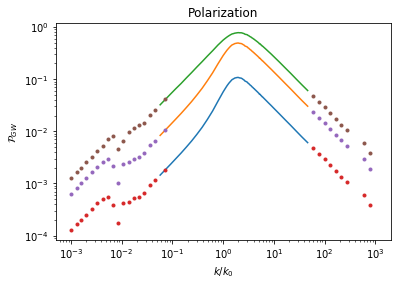

In [89]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]
#hs_ind = range(0, 10)

# Plot polarization where converged
for i in hs_ind:
    _ = plt.plot(sp_rp.k_good, sp_rp.P_good[:,i],
              label = "h = %.2f"%sp.h[i])

# Plot polarization where not converged
for i in hs_ind:
    _ = plt.plot(sp_rp.k_bad, sp_rp.P_bad[:,i], '.',
              label = "not conv h = %.2f"%sp.h[i])

_ = plt.xscale('log')
_ = plt.yscale('log')
#_ = plt.legend()
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

In [96]:
# write data file with the refined spectra around the peak
head = dir0 + "r3_" + sph
#head = dir0 + sph
#head = dir0 + "r2_Mobr"
sp_rp.write_file_pol(head)

Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.10.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.20.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.30.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.40.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.50.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.60.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.70.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.80.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=0.90.txt
Writing data into /home/alberto/tex/roper/helical/python/r3_Mobr_nS_-3.67_nA_-3.67/h=1.00.txt


We can also increase the number of npmax to get more data points converged.

To do so, we compute a higher resolution case using the function pol.refine_case(model1, npx0, npmax, output, plot, write, head),
which computes a new case using k_bad from model1 and higher npmax.
Hence, only some values of k are recomputed.

Once, computed, the data can be written down using the heading ref_

In [72]:
# Read data of refined case
#head_r = dir0 + 'ref_' + sph
head_r = dir0 + 'ref_peak_' + sph
sp_r = pol.read_file_pol(sp.nS, sp.nA, sp.h, sp.broken, head_r)

# refine data of Kol by Kol_r, which only contains data for Kol.k_bad
spref = pol.refine_P_higher_res(sp, sp_r)

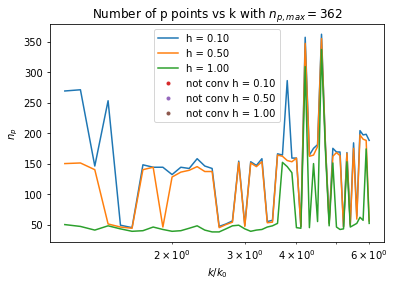

In [73]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# plot n_p vs k
for i in hs_ind:
    
    _= plt.plot(spref.k_good, spref.n_p_good[:, i],
                label = "h = %.2f"%spref.h[i])
    
for i in hs_ind:
    
    _= plt.plot(spref.k_bad, spref.n_p_bad[:, i], '.',
                label = "not conv h = %.2f"%spref.h[i])
    
_= plt.xscale('log')
_= plt.xlabel('$k/k_0$')
_= plt.ylabel('$n_p$')
_= plt.title('Number of p points vs k '
                'with $n_{p,max} = %i$'%spref.npmax)
_= plt.legend()

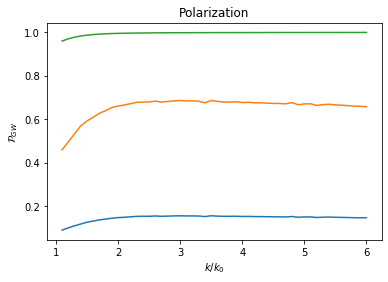

In [74]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Plot polarization where converged
for i in hs_ind:
    _ = plt.plot(spref.k_good, spref.P_good[:,i],
              label = "h = %.2f"%sp.h[i])

# Plot polarization where not converged
for i in hs_ind:
    _ = plt.plot(spref.k_bad, spref.P_bad[:,i], '.',
              label = "not conv h = %.2f"%spref.h[i])

#_ = plt.xscale('log')
#_ = plt.yscale('log')
#_ = plt.legend()
_ = plt.xlabel('$k/k_0$')
_ = plt.ylabel('${\cal P}_{GW}$')
_ = plt.title('Polarization')

In [75]:
# write data file with the new refined spectra
headref = dir0 + "r_peak_" + sph
#headref = dir0 + 'r_Mobr'
spref.write_file_pol(headref)

Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.10.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.20.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.30.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.40.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.50.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.60.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.70.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.80.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=0.90.txt
Writing data into /home/alberto/tex/roper/helical/python/r_peak_Mobr_nS_-3.67_nA_-3.67/h=1.00.txt


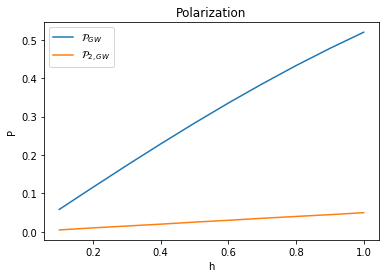

In [209]:
# choose h indices for which to plot
# e.g., 0, 4, 9 to plot h = 0.1, 0.5, 1
hs_ind = [0, 4, 9]

# Compute mean values of IS, IA, P
sp.mean()
#spref.mean()

# Plot P = (mean IS)/(mean IA) and P2 (mean P)
# Note that P is the correct way to define the
# polarization
_= plt.plot(sp.h, sp.Pm,
            label = "${\cal P}_{GW}$")
            #+ " with $n_{p,max} = %i$"%sp.npmax)
#_= plt.plot(spref.h, spref.Pm,
#            label = "${\cal P}_{GW}$" \
#            + " with $n_{p,max} = %i$"%spref.npmax)
_= plt.plot(sp.h, sp.P2m,
            label = "${\cal P}_{2, GW}$")
            #+ " with $n_{p,max} = %i$"%sp.npmax)
_= plt.xlabel('h')
_= plt.legend()
_= plt.ylabel("P")
_= plt.title("Polarization")